<a href="https://colab.research.google.com/github/ksen322/university-projects/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Импортирование библиотек**

In [ ]:
import torch
import random
from math import pi
import numpy as np
import matplotlib.pyplot as plt

**Train выборка**

Создание случайных входных данных

Случайно генерируем 1000 точек в окрестности в диапозоне [-2рi; 2рi] по осям Х и Y

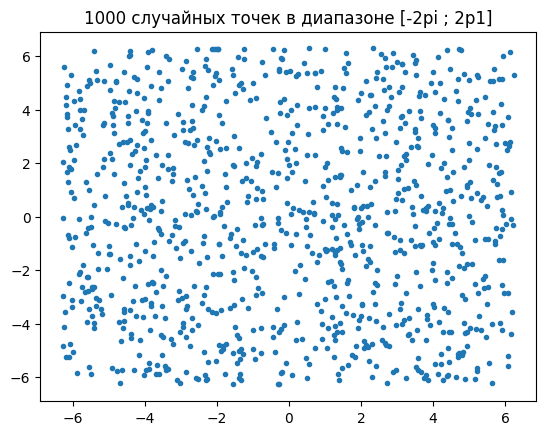

In [ ]:
#Задаем сид генератора случайных числел 6 torch
torch.random.manual_seed(1)
# Создание тензора из 1000 точек no x оси
x = 4*pi*(0.5 - torch.rand(1000))
# Создание тензора из 1000 точек по у оси
y = 4*pi*(0.5 - torch.rand(1000))
# Оприсовываем полученный график
plt.plot(x.numpy(), y.numpy(), '.')
plt.title("1000 случайных точек в диапазоне [-2pi ; 2р1]")
plt.show()

**Разбиение сгенерированных точек на 2 класса**

Точки разбиваются относительно прямой f(x) = 1.5х + 1.5

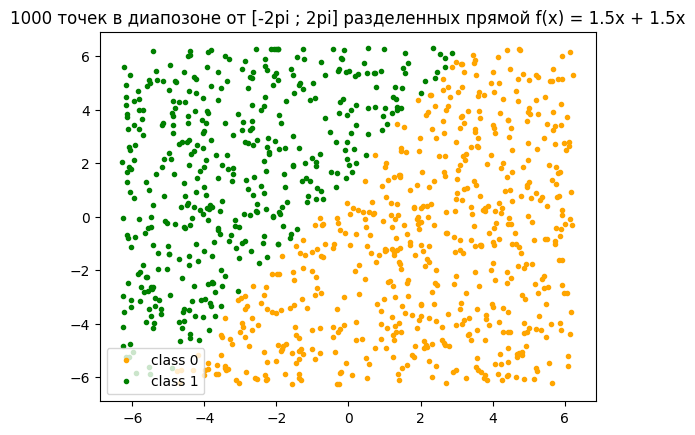

In [ ]:
# k - число для второго ворианта
k = 1.5
# Функция-прямая, для определения границы классов
f = (lambda x: k*x + k)
# Массив знаков точек относительно прямой f(x)
z = np.sign(y - f(x))
# Массив индексов точек, которые находятся ниже прямой f(x)
i1 = [i for i, x in enumerate(z) if x <= 0]
# Массив индексов точек, которые находятся выше прямой f(x)
i2 = [i for i, x in enumerate(z) if x > 0]
# Раскрашиваем два класса точек
# Оранжевый цвет для точек под прямой (клосс 0)
plt.plot(x.numpy()[i1], y.numpy()[i1], '.', c = 'orange', label = 'class 0')
# Зеленый цвет для точек над прямой (класс 1)
plt.plot(x.numpy()[i2], y.numpy()[i2], ".", c = 'green', label = 'class 1')
plt.title("1000 точек в диапозоне от [-2pi ; 2pi] разделенных прямой f(x) = 1.5x + 1.5x")
plt.legend()
plt.show()

**Преобразование данных в пригодные для обучения**

In [ ]:
# Транспонирование тензор рядов
x_train = x.unsqueeze(1)
y_train = y.unsqueeze(1)
O = z.unsqueeze(1)
# Объединение последовательности тензоров в заданном измерении
I = torch.cat((x_train, y_train), dim = 1)

**Test выборка**

Создание равномерно распереденных данных

Генерируем 1000 точек в окрестности в диапозоне [-2pi; 2pi] по осям X и У и распределяем их по всему диапазону:

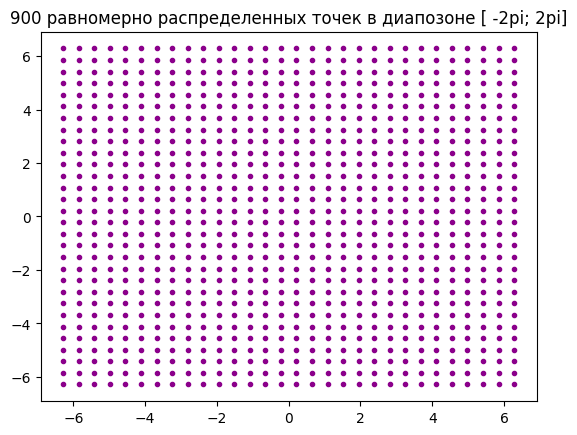

In [ ]:
# Создаем массив из 30 координат x
x = torch.linspace(-2*pi, 2*pi, steps = 30)
# Создаем массив из 30 координат у
y = torch.linspace(-2*pi, 2*pi, steps = 30)
# Распределяем 900 точек no сетке координат исходя из х у, а также заполняем тензорами соответсвующие координаты
x_test, y_test = torch.meshgrid(x, y, indexing = 'xy')
# Отрисует сетку из 900 точек:
plt.plot(x_test.numpy(), y_test.numpy(), '.', c = 'darkmagenta')
plt.title("900 равномерно распределенных точек в диапозоне [ -2pi; 2pi]")
plt.show()

**Преобразование данных в пригодные для тестирования**

In [ ]:
# Flatten преобразует тензор массивов точек в один одномерный тензор, после чего транспонируется
x_test = torch.flatten(x_test).unsqueeze(1)
y_test = torch.flatten(y_test) .unsqueeze(1)
# Объединение последовательности тензоров В заданном измерении
I_test = torch.cat((x_test, y_test), dim = 1)

**Создание нейронной сети**

In [ ]:
class Perceptron(torch.nn. Module):

  def __init__(self, hidden_neurons, input_dim = 2, output_dim = 1):
    super(Perceptron, self).__init__()

    self.layers = torch.nn.Sequential()

    self.layers.add_module('layer 1', torch.nn.Linear(input_dim, hidden_neurons))

    self.layers.add_module('activation 1', torch.nn.ReLU())

    self. layers.add_module('dropout 1', torch.nn.Dropout(p = 0.1))

    self. layers.add_module('layer 2', torch.nn.Linear (hidden_neurons, hidden_neurons))

    self. layers.add_module('activation 2', torch.nn.Sigmoid())

    self. layers.add_module('layer 3', torch.nn.Linear (hidden_neurons, output_dim))

  def forward(self, train_data):
    return self.layers(train_data)

model = Perceptron(30)
model

Perceptron(
  (layers): Sequential(
    (layer 1): Linear(in_features=2, out_features=30, bias=True)
    (activation 1): ReLU()
    (dropout 1): Dropout(p=0.1, inplace=False)
    (layer 2): Linear(in_features=30, out_features=30, bias=True)
    (activation 2): Sigmoid()
    (layer 3): Linear(in_features=30, out_features=1, bias=True)
  )
)

**Обучение нейронной сети**

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
# Oшибка MSE
def loss(pred, target):

  ans = (pred - target)**2
  return ans.mean()

for epoch in range(1000):

  optimizer.zero_grad()
  y_pred = model.forward(I)
  loss_val = loss(y_pred, O)
  loss_val.backward()
  optimizer.step()

  if not epoch % 100:

    y_pred = model.forward(I)
    print((((y_pred - O)**2).mean())**0.5)

tensor(0.9487, grad_fn=<PowBackward0>)
tensor(0.1818, grad_fn=<PowBackward0>)
tensor(0.1375, grad_fn=<PowBackward0>)
tensor(0.1125, grad_fn=<PowBackward0>)
tensor(0.0798, grad_fn=<PowBackward0>)
tensor(0.0734, grad_fn=<PowBackward0>)
tensor(0.0673, grad_fn=<PowBackward0>)
tensor(0.0678, grad_fn=<PowBackward0>)
tensor(0.0518, grad_fn=<PowBackward0>)
tensor(0.0515, grad_fn=<PowBackward0>)


**Тестирование нейронной сети**

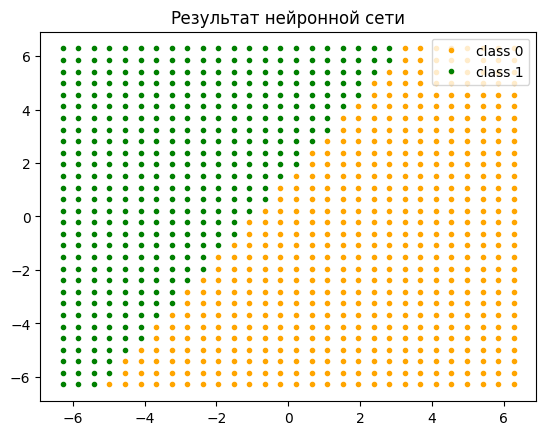

In [ ]:
with torch.no_grad():
  prediction = model.forward(I_test)

# Массив индексов точек, которые находятся ниже прямой (x)
i1 = [i for i, x in enumerate(prediction) if x <= 0]
# Массив индексов точек, копорые находятся Выше прямой £(x)
i2 = [i for i, x in enumerate(prediction) if x > 0]
# Раскрашиваем два класса точек
# Оранжевый цвет для точек под прямой (класс 0)
plt.plot(x_test.detach().numpy()[i1], y_test.detach().numpy()[i1], '.', c = 'orange', label = 'class 0')
# Зеленый цвет для точек над прямой (класс 1)
plt.plot(x_test.detach().numpy()[i2], y_test.detach().numpy()[i2], '.', c = 'green', label = 'class 1')
plt.title("Peзультат нейронной сети")
plt.legend()
plt.show()

**Численная оценка точности**

Для численной оценки создадим функцию, которая вернет тензор из точных значений классов точек и сравним полученные предсказания класса с точностью до 1 знака после запятой

In [ ]:
def real():
  x = torch.linspace(-2*pi, 2*pi, steps = 30)
  y = torch.linspace(-2*pi, 2*pi, steps = 30)

  x, y = torch.meshgrid(x, y, indexing = 'xy')

  k = 1.5
  # Функция-прямая, для опредедения границы классов
  f = (lambda x: k*x + k)
  # Maссив знаков точек относительно прямой f(x)
  z = np.sign(y - f(x))

  return torch.flatten(z).unsqueeze(1)

real = real()
mistakes = []

for i in range(900):

  if real.numpy()[i][0] != round(prediction.numpy()[i][0], 1):
    mistakes.append(f'miss {i}')

accuracy = float('{:.2f}'.format(len(mistakes)/900))
print(f"Bcero точек = 900\nКоличество ошибок = {len(mistakes)}\nТочность = {100 - accuracy*100}%")

Bcero точек = 900
Количество ошибок = 29
Точность = 97.0%
